# 분류 알고리즘

## 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 아이리스 데이터셋

In [2]:
iris_dt = load_iris()
train_x, test_x, train_y, test_y = train_test_split(iris_dt.data, iris_dt.target,
                                                    test_size=0.2, random_state=0)

In [32]:
!pip install xgboost==1.5.0

  Using cached xgboost-1.5.0-py3-none-win_amd64.whl (106.6 MB)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[22:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


tree    1.000000
gnb     0.966667
knn     0.966667
lr      1.000000
svm     1.000000
rf      1.000000
gb      1.000000
xgb     1.000000
dtype: float64

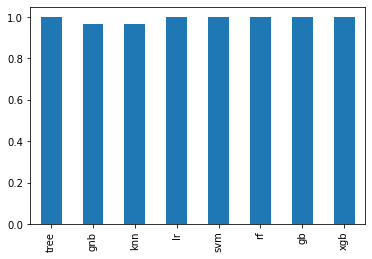

In [9]:
def union_clf(train_x, test_x, train_y, test_y):
    result = dict()

    # 의사결정나무 알고리즘
    from sklearn.tree import DecisionTreeClassifier
    tree_clf = DecisionTreeClassifier()
    tree_clf.fit(train_x, train_y)
    result['tree'] = tree_clf.score(test_x, test_y)

    # 가우시안 나이브 베이즈 알고리즘
    from sklearn.naive_bayes import GaussianNB
    gnb_clf = GaussianNB()
    gnb_clf.fit(train_x, train_y)
    result['gnb'] = gnb_clf.score(test_x, test_y)

    # K-최근접 이웃 알고리즘
    from sklearn.neighbors import KNeighborsClassifier
    knn_clf = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃을 3개를 사용하도록 구성
    knn_clf.fit(train_x, train_y)
    result['knn'] = knn_clf.score(test_x, test_y)

    # 로지스틱 리그레션
    from sklearn.linear_model import LogisticRegression
    lr_clf = LogisticRegression()
    lr_clf.fit(train_x, train_y)
    result['lr'] = lr_clf.score(test_x, test_y)

    # SVM
    from sklearn.svm import SVC
    svm_clf = SVC()
    svm_clf.fit(train_x, train_y)
    result['svm'] = svm_clf.score(test_x, test_y)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf_clf = RandomForestClassifier(random_state=0)
    rf_clf.fit(train_x, train_y)
    result['rf'] = rf_clf.score(test_x, test_y)

    # GBM
    from sklearn.ensemble import GradientBoostingClassifier
    gb_clf = GradientBoostingClassifier(random_state=0)
    gb_clf.fit(train_x, train_y)
    result['gb'] = gb_clf.score(test_x, test_y)

    # XGBoost
    from xgboost import XGBClassifier
    xgb_clf = XGBClassifier()
    xgb_clf.fit(train_x, train_y)
    result['xgb'] = xgb_clf.score(test_x, test_y)

    result_df = pd.Series(result)

    result_df.plot(kind='bar')
    return result_df

union_clf(train_x, test_x, train_y, test_y)

# Titanic - Machine Learning from Disaster
승객이 타이타닉호의 침몰에서 살아남았는지 여부를 예측하는 것은 당신의 임무입니다.
- 테스트 세트의 각각에 대해 변수에 대해 0 또는 1 값을 예측해야 합니다.
- 점수 측정 방식: 점수는 정확하게 예측한 승객의 비율, 정확도

15분부터 같이 진행

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## 타이타닉 데이터 불러오기
titanic_df = pd.read_csv("titanic_train.csv")

## 미싱 데이터 처리
# 나이
age_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
_age = titanic_df['Age'].values
age_imputer.fit(_age.reshape(-1, 1))
titanic_df['Age'] = age_imputer.transform(_age.reshape(-1, 1))

# 선착장 정보
embarked_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
_embarked = titanic_df['Embarked'].values
embarked_imputer.fit(_embarked.reshape(-1, 1))
titanic_df['Embarked'] = embarked_imputer.transform(_embarked.reshape(-1, 1))

## 데이터 처리 방식에 따라 분류
x_0 = titanic_df.drop(['PassengerId', 'Survived', 'Cabin', 
                     'Ticket', 'Name', 'Embarked', 'Sex'],
                    axis=1).values
y = titanic_df['Survived'].values

## Pclass, Age, SibSp, Parch, Fare 값의 스탠다드 스케일러 처리
titanic_sc = StandardScaler()
titanic_sc.fit(x_0)
x_0 = titanic_sc.transform(x_0)

# 'Sex'의 레이블 정리
sex_le = LabelEncoder()
x_sex = sex_le.fit_transform(titanic_df['Sex'].values)

# 'Embarked' 원핫인코딩
embarked_list = ['C', 'Q', 'S']
embarked_ohe = OneHotEncoder(categories=[embarked_list], handle_unknown='ignore')
x_embarked = embarked_ohe.fit_transform(titanic_df['Embarked'].values.reshape(-1,1)).toarray()

# X 합치기
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 
           'Embarked_C', 'Embarked_Q', 'Embarked_S']
x = np.concatenate([x_0, x_sex.reshape(-1,1), x_embarked], axis=1)
preprocced_titanic_df = pd.DataFrame(x, columns=columns)
preprocced_titanic_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0.0,1.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,0.0,0.0,0.0,1.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1.0,0.0,0.0,1.0


[22:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


tree    0.776536
gnb     0.798883
knn     0.793296
lr      0.798883
svm     0.804469
rf      0.854749
gb      0.837989
xgb     0.849162
dtype: float64

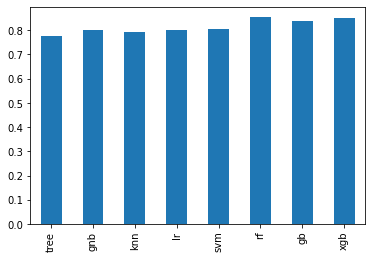

In [10]:
from sklearn.model_selection import train_test_split

ttn_train_x, ttn_test_x, ttn_train_y, ttn_test_y = train_test_split(x, y, test_size=0.2, random_state=0)
union_clf(ttn_train_x, ttn_test_x, ttn_train_y, ttn_test_y)

# 전처리를 수행하지 않고 분류 했을 때 결과

In [28]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## 타이타닉 데이터 불러오기
raw_titanic_df = pd.read_csv("titanic_train.csv")
raw_titanic_df = raw_titanic_df.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin' ], axis=1).dropna()

In [29]:
x = raw_titanic_df.drop(['Survived'], axis=1).values
y = raw_titanic_df['Survived'].values
x.shape

(714, 6)

In [30]:
from sklearn.model_selection import train_test_split

raw_ttn_train_x, raw_ttn_test_x, raw_ttn_train_y, raw_ttn_test_y = train_test_split(x,y, test_size=0.2, random_state=0)

C:\Users\isc03\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\isc03\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


tree    0.657343
gnb     0.664336
rf      0.741259
gb      0.727273
xgb     0.706294
dtype: float64

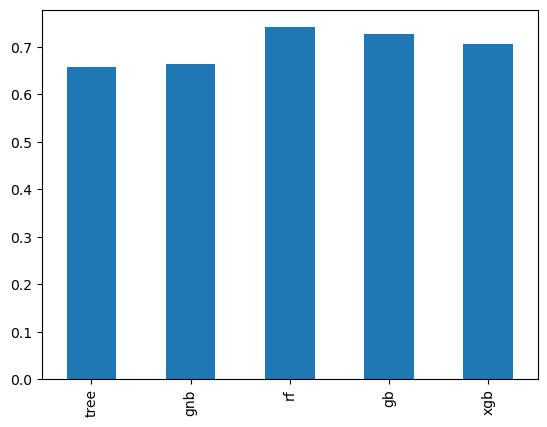

In [33]:
def union_clf(train_x, test_x, train_y, test_y):
    result = dict()

    # 의사결정나무 알고리즘
    from sklearn.tree import DecisionTreeClassifier
    tree_clf = DecisionTreeClassifier()
    tree_clf.fit(train_x, train_y)
    result['tree'] = tree_clf.score(test_x, test_y)

    # 가우시안 나이브 베이즈 알고리즘
    from sklearn.naive_bayes import GaussianNB
    gnb_clf = GaussianNB()
    gnb_clf.fit(train_x, train_y)
    result['gnb'] = gnb_clf.score(test_x, test_y)
    
    '''
    # K-최근접 이웃 알고리즘
    from sklearn.neighbors import KNeighborsClassifier
    knn_clf = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃을 3개를 사용하도록 구성
    knn_clf.fit(train_x, train_y)
    result['knn'] = knn_clf.score(test_x, test_y)
    
    # 로지스틱 리그레션
    from sklearn.linear_model import LogisticRegression
    lr_clf = LogisticRegression()
    lr_clf.fit(train_x, train_y)
    result['lr'] = lr_clf.score(test_x, test_y)
    
    
    # SVM
    from sklearn.svm import SVC
    svm_clf = SVC()
    svm_clf.fit(train_x, train_y)
    result['svm'] = svm_clf.score(test_x, test_y)
    '''
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf_clf = RandomForestClassifier(random_state=0)
    rf_clf.fit(train_x, train_y)
    result['rf'] = rf_clf.score(test_x, test_y)

    # GBM
    from sklearn.ensemble import GradientBoostingClassifier
    gb_clf = GradientBoostingClassifier(random_state=0)
    gb_clf.fit(train_x, train_y)
    result['gb'] = gb_clf.score(test_x, test_y)

    # XGBoost
    from xgboost import XGBClassifier
    xgb_clf = XGBClassifier()
    xgb_clf.fit(train_x, train_y)
    result['xgb'] = xgb_clf.score(test_x, test_y)

    result_df = pd.Series(result)

    result_df.plot(kind='bar')
    return result_df

union_clf(raw_ttn_train_x, raw_ttn_test_x, raw_ttn_train_y, raw_ttn_test_y)

''' 전처리 후
tree    0.776536
gnb     0.798883
knn     0.793296
lr      0.798883
svm     0.804469
rf      0.854749
gb      0.837989
xgb     0.849162
'''

''' 전처리를 수행하지 않고 쓸 수 있는 데이터만 사용
tree    0.657343
gnb     0.664336
rf      0.741259
gb      0.727273
xgb     0.706294
'''